***
# <center>R2.07 - Graphes <br>TP1- Exemples de graphes <center>
***

_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

### Imports

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')


## 1 -  Quelques matrices d'adjacence

> <font color=darkorange> **_Question 1 :_** </font>
> En partant d'une matrice remplie de 0 : <tt>**A=np.zeros((n,n))**</tt>, écrire une méthode qui renvoie la **matrice d'adjacence** du graphe complet à $n$ sommets. *(Rappel : tous les sommets sont reliés entres eux)*

In [16]:
def complet(n):
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i][j] = 1
     #TODO#
                
    return A#TODO#

print(complet(5))

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]


> <font color=darkorange> **_Question 2 :_** </font>
>Même question en partant d'une matrice remplie de 1 : **<tt>np.ones</tt>**, puis comparer les deux méthodes.

In [17]:
def complet2(n):
    A=np.ones((n,n))
    for i in range(n):
        A[i][i] = 0
     #TODO#
    
    return A #TODO#

print(complet(5))

#Une boucle en moins

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]


> <font color=darkorange> **_Question Bonus :_** </font> Même questions pour les autres familles de graphes décrites dans le cours.

> <font color=darkorange> **_Question 3 :_** </font>
>Écrire une méthode **`info`** prenant en entrée une matrice d'adjacence d'un graphe, et renvoyé une liste contenant, dans l'ordre, les informations suivantes :
>* son ordre (le nombre de sommet)
>* sa taille (le nombre d'arêtes)
>* la liste des degrés


In [29]:
def info(A): 
    ordre = len(A)
    taille = 0
    degres = [0 for _ in range(ordre)]
    for i in range(ordre):
        for j in range(ordre):
            taille += A[i][j]
            degres[i] += A[i][j]
    #TODO#
    
    return ordre, taille/2, degres
    
print(info(complet2(4)))

(4, 6.0, [3.0, 3.0, 3.0, 3.0])


Il est toujours agréable d'avoir un support visuel. Pour cela (et pour bien d'autres applications), on va utiliser le module **`networkx`**, qui peut notamment tracer un graphe à partir de sa matrice d'adjacence.

La doc se trouve [ici](https://networkx.org/documentation/stable/index.html), et voici un exemple d'utilisation :


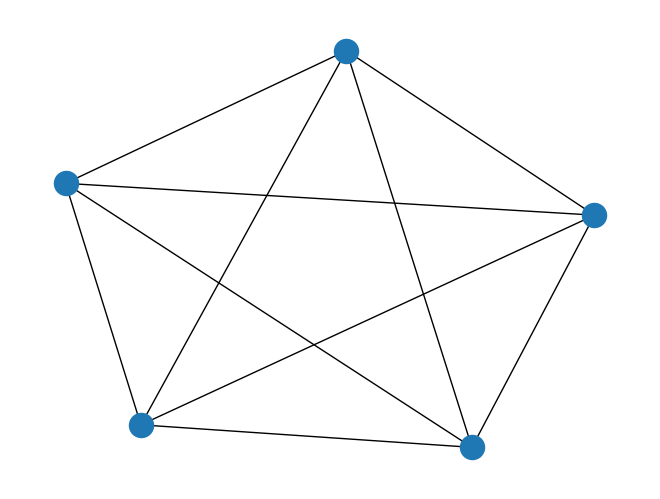

In [28]:
A=complet(5)
G=nx.from_numpy_array(A)
#aller voir dans la doc comment fonctionne from_numpy_array
nx.draw(G)

> <font color=darkorange> **_Question 4 :_** </font>
> Définir (à la main) la matrice d'adjacence du graphe taureau, puis dessiner ce graphe à l'aide de **networkx**.

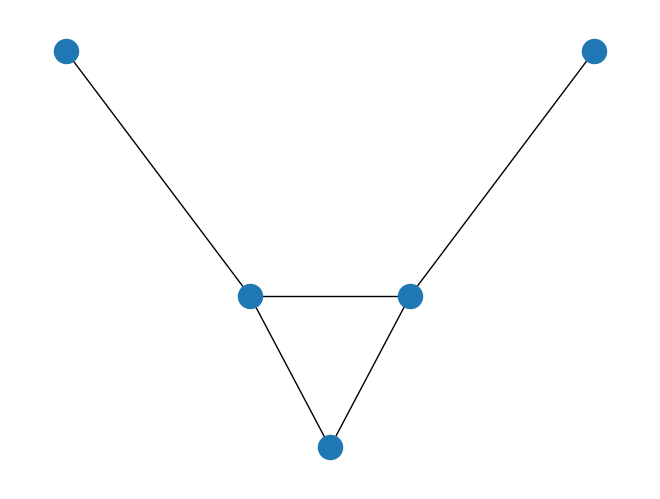

In [39]:
#en profiter pour aller voir la doc networkx sur la fonction draw
B=np.array([[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0],[0,1,1,0,1],[0,0,0,1,0]]
    
    #TODO#
    
)

G=nx.from_numpy_array(B)
nx.draw(G,pos=nx.spectral_layout(G))

> <font color=darkorange> **_Question 5 :_** </font>
> Après avoir manipuler le code suivant, décrivez son fonctionnement.



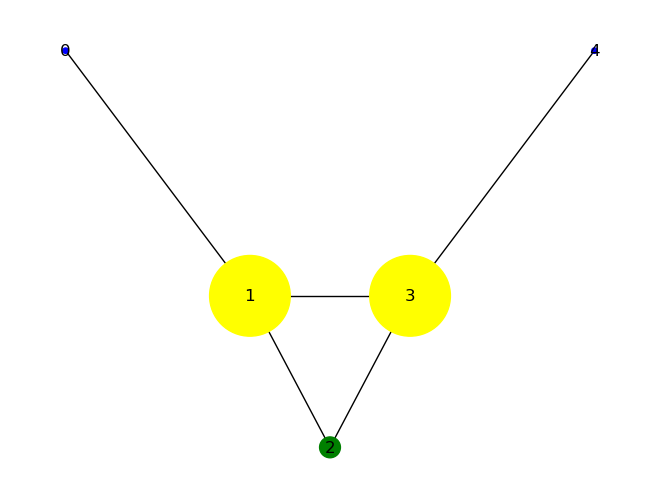

In [44]:
d = info(B)[2]

map_col=['black','blue','green','yellow','orange','red','purple']

def col_deg(d,m=map_col):
    return [m[i] for i in d ]

nx.draw(G, nodelist=range(len(d)), node_size=[15**v for v in d],node_color=col_deg(d),with_labels=True,pos=nx.spectral_layout(G))
plt.show()

**Description :**
    On recherche grâce à info les degrés de chaque sommet et donc pour chaque sommet on donne une taille et une couleur, de plus on donne le numéro de chaque sommet.
  
    

> <font color=darkorange> **_Question Bonus :_** </font> 
> À l'aide du paramètre `node_size`, dessiner le graphe de sorte à ce que que la taille de chaque sommet soit proportionnelle à son degré.


##  2 - Quelques graphes aléatoires



Pour des raisons de modélisation ou de test, il peut être utile de créer des graphes aléatoire plutôt que de prendre des exemples dans des familles prédéfinies. Dans cette partie nous allons voir deux constructions classique de graphes aléatoires : les graphes d'**Erdös-Renyi** et le **modèle stochastique par bloc** (SBM).




### 2.1 - Graphe d'Erdös-Renly

Le graphe d'Erdös-Renly de paramètre $n$ et $p$ est le graphe **non-orienté** d'ordre $n$ tel que deux sommets sont reliés avec probabilité $p$. La méthode de construction est la suivante :
1) On part d'une matrice nulle de taille $n \times n$.
2) Pour tout couple de sommet $(i,j)$, on ajoute l'arête avec probabilité $p$.

Une manière d'obtenir cette probabilité est de tirer une pièce biaisée grâce à <tt>np.random.binomial(1,p)</tt>


> <font color=darkorange> **_Question 6 :_** </font>
> 1) Écrire une fonction **`ErdoxRenly`**, prenant en entée deux paramètre n et p, en renvoyant la matrice d'adjacence d'un graphe d'Erdos-Renly.
> 2) Tracer ce graphe à l'aide de networkx

In [152]:
def ErdosRenly(n,p):
    """
     Renvoie la matrice d'adjacence d'un graphe d'Erdös-Renly

    :param n: nombre de sommets
    :type n:  int
    :param p: probabilité d'arête
    :type p:  float entre 0 et 1    
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    """
    for i in range(n):
        for j in range(i, n):
            nbAlea = np.random.binomial(1,p)
            A[i][j] = nbAlea
            A[j][i] = nbAlea

    #TODO#
    
    return A #TODO#

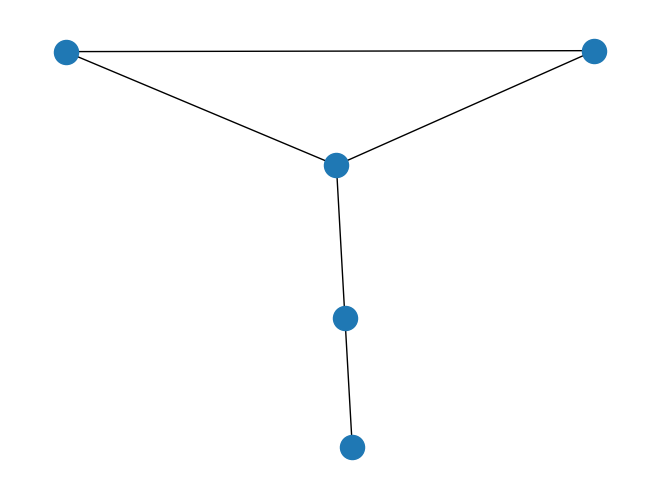

In [237]:
C=ErdosRenly(5,0.3)
    
    #TODO#  

G=nx.from_numpy_array(C)
nx.draw(G)

### 2.2 - Graphe stochastique par blocs

Le modèle stochastique par bloc est plus complexe, mais offre de nombreuses possibilités de modélisation, notamment de reseaux sociaux. 
L'idée est la suivante :
1) On part d'une liste de $k$ communautés $[c_1,c_2,...,c_k]$, où $c_i$ est la taille de la communauté $i$
2) On intialise la matrice d'adjacence par une matrice remplie de 0
3) Pour tout couple de sommet $(i,j)$, si $i$ et $j$ sont dans la même communauté, ils sont liés avec probabilité $p_{in}$, s'ils ne sont pas dans la même communauté ils sont liés avec probabilité $p_{out}$".

> <font color=darkorange> **_Question 7 :_** </font>
> 1) Écrire une fonction **`SMB_homebrew`**, prenant en entée trois paramètres, une liste de taille, une probabilité $p_{in}$ ainsi qu'une probabilité $p_{out}$, et renvoyant la matrice d'adjacence d'un graphe stochastique par blocs.
> 2) Tracer ce graphe à l'aide de networkx

In [239]:
#SBM homebrew

def SBM_homebrew(array,pin,pout):
    """
     Renvoie la matrice d'adjacence d'un SBM

    :param array: tailles des différentes communautés
    :type array:  array of int
    :param pin: probabilité d'arête à l'intérieur d'une communauté
    :type pin:  float entre 0 et 1    
    :param pout: probabilité d'arête entre deux communautés
    :type pout:  float entre 0 et 1       
    :return: matrice d'adjacence 
    :rtype: numpy array of int
    
    """
    n = sum(array)
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            if array[i] == array[j]:
                nbAlea = np.random.binomial(1,pin)
                A[i][j] = nbAlea
                A[j][i] = nbAlea
            else:
                nbAlea = np.random.binomial(1,pout)
                A[i][j] = nbAlea
                A[j][i] = nbAlea

    return A

D=SBM_homebrew([10,10,10],0.8,0.2)
    
    #TODO#  

G=nx.from_numpy_array(D)
nx.draw(G)

IndexError: list index out of range

> <font color=darkorange> **_Question Bonus :_** </font> À l'aide de Networkx, améliorer l'affichage de ces graphes. En particulier il serait intéressant de colorier les sommets en fonction de leurs degrés (qui peut être grand dans ce cas). Le mot clef <tt>cmap</tt> pourrait être utile.